# Decision Tree


>https://www.analyticsvidhya.com/blog/2017/09/30-questions-test-tree-based-models/

>https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

>https://towardsdatascience.com/decision-tree-algorithm-explained-83beb6e78ef4

>https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134

> This is more simple to Understand Decision Tree[https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01]

In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [75]:
read = pd.read_csv('/home/vikas/Downloads/Social_Network_Ads.csv')
read.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [76]:
feature = ['Age','EstimatedSalary']
feature

['Age', 'EstimatedSalary']

In [77]:
x=read.iloc[:,[2,3]].values
y= read.iloc[:,4].values
col_name = read[['Age','EstimatedSalary']].columns

# The next step is to split the dataset into training and test.

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [79]:
read.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [80]:
read.index

RangeIndex(start=0, stop=400, step=1)

In [81]:
read.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [82]:
x_train

array([[    37,  79000],
       [    38,  61000],
       [    20,  74000],
       [    27,  88000],
       [    23,  28000],
       [    32,  86000],
       [    21,  88000],
       [    28,  89000],
       [    19,  26000],
       [    31,  76000],
       [    56,  60000],
       [    31,  68000],
       [    35,  22000],
       [    59,  42000],
       [    26,  80000],
       [    18,  52000],
       [    53, 104000],
       [    27,  90000],
       [    31,  71000],
       [    30,  80000],
       [    28,  79000],
       [    28,  85000],
       [    41,  72000],
       [    60,  34000],
       [    46,  82000],
       [    47,  34000],
       [    33,  69000],
       [    26,  15000],
       [    36, 144000],
       [    35,  38000],
       [    31,  18000],
       [    52, 114000],
       [    34,  43000],
       [    25,  80000],
       [    53,  72000],
       [    45,  26000],
       [    37,  53000],
       [    60, 102000],
       [    32, 117000],
       [    42,  80000],


# Perform feature scaling


>The main idea is to normalize/standardize (mean = 0 and standard deviation = 1) your features/variables/columns of X before applying machine learning techniques.

>IMPORTNANT: StandardScaler() will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable will have mean = 0 and standard deviation = 1.

In [83]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test= sd.fit_transform(x_test)

/home/vikas/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [84]:
x_train,x_test

(array([[-0.03449842,  0.26845438],
        [ 0.06066963, -0.25929212],
        [-1.65235532,  0.12185813],
        [-0.98617895,  0.53232764],
        [-1.36685117, -1.22682738],
        [-0.51033869,  0.47368914],
        [-1.55718727,  0.53232764],
        [-0.8910109 ,  0.56164689],
        [-1.74752338, -1.28546588],
        [-0.60550674,  0.18049663],
        [ 1.77369459, -0.28861137],
        [-0.60550674, -0.05405737],
        [-0.22483453, -1.40274288],
        [ 2.05919875, -0.81635787],
        [-1.08134701,  0.29777364],
        [-1.84269143, -0.52316537],
        [ 1.48819043,  1.00143564],
        [-0.98617895,  0.59096614],
        [-0.60550674,  0.03390038],
        [-0.70067479,  0.29777364],
        [-0.8910109 ,  0.26845438],
        [-0.8910109 ,  0.44436989],
        [ 0.34617379,  0.06321963],
        [ 2.15436681, -1.05091188],
        [ 0.82201406,  0.35641214],
        [ 0.91718211, -1.05091188],
        [-0.41517063, -0.02473812],
        [-1.08134701, -1.607

# Fit the model in the Decision Tree classifier.

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
dtc1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
clasifier = dtc1.fit(x_train,y_train)

# Make predictions and check accuracy.

In [87]:
#prediction
y_pred = dtc1.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [88]:
from sklearn import metrics
print('Acuracy',metrics.accuracy_score(y_pred,y_test))

Acuracy 0.9


# Confusion Matrix

In [89]:
from sklearn.metrics  import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[46,  2],
       [ 6, 26]])

# Let us first visualize the model prediction results.

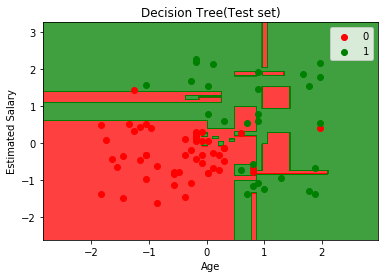

In [90]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2,dtc1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha=0.75, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("red","green"))(i),label = j)
plt.title("Decision Tree(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

In [91]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import dtcpydotplusdot_data = StringIO()
# export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [92]:
from sklearn.tree import export_graphviz

In [93]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
# import pydotplusdot_data = StringIO()
import pydotplus
dot_data = StringIO()

In [94]:
export_graphviz(dtc1,  
                filled=True, rounded=True,
                special_characters=True,feature_names = read['Age','EstimatedSalary'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
# dot_data = tree.export_graphviz(dtc1)
# graph = pydotplus.graphviz.graph_from_dot_data(dot_data)


KeyError: ('Age', 'EstimatedSalary')

# Visualize A Decision Tree

>https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/

In [59]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pydotplus

In [60]:
read = datasets.load_iris()
x = read.data
y = read.target

In [61]:
read.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [62]:
dtc = DecisionTreeClassifier()
dtc.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
#dtc
read.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [64]:
dot_tree = tree.export_graphviz(dtc,out_file=None, 
                                feature_names=read.feature_names,  
                                class_names=read.target_names)


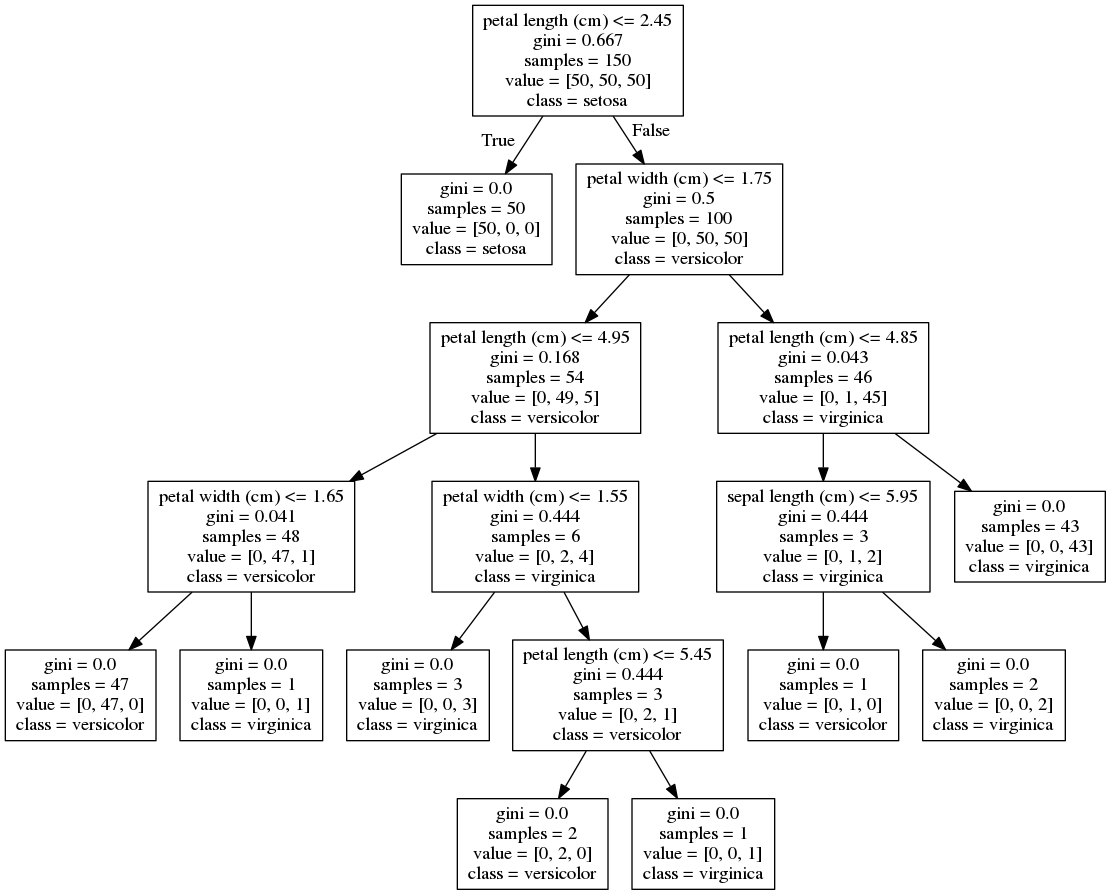

In [65]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_tree)  

# Show graph
Image(graph.create_png())

In [66]:
read

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

# preprocessing on above data

In [17]:
read1 = pd.DataFrame(read.data,columns = read.feature_names).head()
read1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
type(read)

pandas.core.frame.DataFrame

In [39]:
type(read)

sklearn.utils.Bunch

In [40]:
type(read1)

pandas.core.frame.DataFrame

# Repeatation

In [54]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
#from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pydotplus

r = pd.read_csv('/home/vikas/Downloads/Social_Network_Ads.csv')
r.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [57]:
x1=read.iloc[:,[2,3]].values
y1= read.iloc[:,4].values
#col_name = read[['Age','EstimatedSalary']].columns
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)


from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test= sd.fit_transform(x_test)

from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
clasifier = dtc1.fit(x_train,y_train)
dtc = DecisionTreeClassifier()
dtc.fit(x1,y1)
y_pred = dtc1.predict(x_test)
y_pred


from sklearn import metrics
print('Acuracy',metrics.accuracy_score(y_pred,y_test))

Acuracy 0.9


/home/vikas/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
